In [43]:
import warnings
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
warnings.filterwarnings('ignore')

In [45]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [46]:
np.random.seed(42)

In [47]:
df = pd.read_pickle('./Pickles/modeling_df.pkl')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034 entries, 0 to 1771
Data columns (total 27 columns):
drug_name                     1034 non-null object
generic_name                  1034 non-null object
grx_lowest_price              1034 non-null float64
grx_pharmacy                  1034 non-null object
grx_purchase                  1034 non-null object
grx_lowest_price_adj          1034 non-null float64
chem_name                     1034 non-null object
affected_organisms            1034 non-null object
chem_state                    1034 non-null object
chem_class                    1034 non-null object
drug_group                    1034 non-null object
drug_type                     1034 non-null object
chem_kingdom                  1034 non-null object
molecular_framework           1034 non-null object
avg_molecular_weight          1034 non-null float64
num_clinical_trials           1034 non-null float64
num_dosage_forms              1034 non-null float64
num_drug_interactions

In [49]:
# created dataframes for dummy variables for chem_kingdom and chem_state.
# joined dummy variable dataframes with main dataframe.
chem_kingdom = pd.get_dummies(df['chem_kingdom'])
chem_state = pd.get_dummies(df['chem_state'])
df.drop(['chem_kingdom', 'chem_state'], axis = 1, inplace = True)
df = deepcopy(pd.concat([df, chem_state, chem_kingdom], axis = 1, join = 'outer')).reset_index()

In [50]:
df.describe()

,index,grx_lowest_price,grx_lowest_price_adj,avg_molecular_weight,num_clinical_trials,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,nadac_cost_per_unit,Liquid,Solid,Organic compounds
count,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000,1034.000
mean,943.170,454.056,15.434,361.775,90.879,18.091,1018.339,1.579,7.818,28.297,6.845,1.472,16.894,0.021,0.979,1.000
std,502.500,2193.349,77.154,178.646,136.040,19.787,522.318,1.405,10.320,25.891,11.171,3.725,67.045,0.144,0.144,0.000
min,0.000,2.000,0.067,76.055,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.030,0.000,0.000,1.000
25%,518.250,15.973,0.374,258.505,17.000,6.000,652.250,0.000,0.000,7.000,0.000,0.000,0.669,0.000,1.000,1.000
50%,991.000,37.725,0.936,325.488,47.000,12.000,986.500,1.000,3.000,22.000,4.000,0.000,3.025,0.000,1.000,1.000
75%,1370.500,182.422,4.867,414.491,111.750,22.000,1389.000,2.000,12.000,45.000,8.000,1.000,10.563,0.000,1.000,1.000
max,1771.000,31215.000,993.321,1681.890,1635.000,169.000,2388.000,6.000,62.000,113.000,82.000,33.000,975.300,1.000,1.000,1.000


In [160]:
len(df[df['grx_lowest_price_adj'] >= 500])

9

In [52]:
# created new column for whether affected_organisms was 'Humans and other mammals' or not.
df.loc[df['affected_organisms'] == 'Humans and other mammals', 'affected_humans_other_mammals'] = 1
df.loc[df['affected_organisms'] != 'Humans and other mammals', 'affected_humans_other_mammals'] = 0

# created new column for whether the drug was ever an investigational drug.
df.loc[['Investigational' in s for s in df['drug_group']], 'investigational_drug'] = 1
df.loc[['Investigational' not in s for s in df['drug_group']], 'investigational_drug'] = 0

# created new column for whether the drug was ever an illicit drug.
df.loc[['Illicit' in s for s in df['drug_group']], 'illicit_drug'] = 1
df.loc[['Illicit' not in s for s in df['drug_group']], 'illicit_drug'] = 0

# created new column for whether the drug was ever a veterinarian approved drug.
df.loc[['Vet approved' in s for s in df['drug_group']], 'vet_approved_drug'] = 1
df.loc[['Vet approved' not in s for s in df['drug_group']], 'vet_approved_drug'] = 0

# created new column for whether the drug was a nutraceutical drug.
df.loc[['Nutraceutical' in s for s in df['drug_group']], 'nutraceutical_drug'] = 1
df.loc[['Nutraceutical' not in s for s in df['drug_group']], 'nutraceutical_drug'] = 0

# created new column for whether the drug was ever withdrawn FDA approval.
df.loc[['Withdrawn' in s for s in df['drug_group']], 'withdrawn_drug'] = 1
df.loc[['Withdrawn' not in s for s in df['drug_group']], 'withdrawn_drug'] = 0

# created new column for whether a generic version of the drug exists.
df.loc[df['generic_name'] == 'Non-Existant', 'generic_drug'] = 1
df.loc[df['generic_name'] != 'Non-Existant', 'generic_drug'] = 0

# created new column for whether the molecular framework of the drug was of an aromatic type.
df.loc[['Aromatic' in s for s in df['molecular_framework']], 'aromatic_molecular_framework'] = 1
df.loc[['Aromatic' not in s for s in df['molecular_framework']], 'aromatic_molecular_framework'] = 0

In [53]:
df.columns

Index(['index', 'drug_name', 'generic_name', 'grx_lowest_price',
       'grx_pharmacy', 'grx_purchase', 'grx_lowest_price_adj', 'chem_name',
       'affected_organisms', 'chem_class', 'drug_group', 'drug_type',
       'molecular_framework', 'avg_molecular_weight', 'num_clinical_trials',
       'num_dosage_forms', 'num_drug_interactions', 'num_food_interactions',
       'num_manufacturers_for_chem', 'num_packagers_for_chem',
       'num_patents_on_chem', 'num_targets', 'chem_sub_class',
       'chem_super_class', 'over_the_counter', 'nadac_cost_per_unit', 'Liquid',
       'Solid', 'Organic compounds', 'affected_humans_other_mammals',
       'investigational_drug', 'illicit_drug', 'vet_approved_drug',
       'nutraceutical_drug', 'withdrawn_drug', 'generic_drug',
       'aromatic_molecular_framework'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# df.corr()

### **Train Test Split**

In [56]:
feature_names = ['avg_molecular_weight', 'num_clinical_trials',
                 'num_dosage_forms', 'num_drug_interactions',
                 'num_food_interactions', 'num_manufacturers_for_chem',
                 'num_packagers_for_chem', 'num_patents_on_chem',
                 'num_targets', 'nadac_cost_per_unit', 'Solid',
                 'affected_humans_other_mammals', 'investigational_drug',
                 'vet_approved_drug', 'illicit_drug', 'nutraceutical_drug',
                 'generic_drug', 'aromatic_molecular_framework']

X = df[feature_names]
y = df['grx_lowest_price_adj']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

### **Standard Scaler**

First use a standard scaler to level all features in the model.

In [57]:
from sklearn.preprocessing import StandardScaler

In [88]:
X_train_scaled.shape

(620, 18)

In [89]:
X_test_scaled.shape

(414, 18)

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a dataframe to see scaled features.

In [92]:
df_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
df_scaled.head()

,avg_molecular_weight,num_clinical_trials,num_dosage_forms,num_drug_interactions,num_food_interactions,num_manufacturers_for_chem,num_packagers_for_chem,num_patents_on_chem,num_targets,nadac_cost_per_unit,Solid,affected_humans_other_mammals,investigational_drug,vet_approved_drug,illicit_drug,nutraceutical_drug,generic_drug,aromatic_molecular_framework
0,0.350,-0.567,-0.578,0.391,-0.416,-0.671,-0.884,-0.247,-0.403,-0.077,0.134,0.439,1.020,-0.342,-0.225,-0.128,-0.273,0.449
1,-1.022,1.161,0.754,1.552,0.297,0.972,1.452,0.615,-0.403,-0.138,0.134,0.439,1.020,-0.342,-0.225,-0.128,3.663,-2.227
2,1.050,-0.592,-0.716,-0.096,0.297,-0.768,-1.118,0.136,-0.403,-0.102,0.134,0.439,-0.981,-0.342,-0.225,-0.128,-0.273,0.449
3,2.029,-0.196,-0.624,-1.245,-1.130,-0.768,-1.118,-0.151,-0.403,10.725,0.134,-2.280,1.020,-0.342,-0.225,-0.128,-0.273,0.449
4,-0.387,-0.697,0.617,-1.120,-0.416,-0.768,1.529,-0.630,-0.403,-0.256,0.134,0.439,-0.981,-0.342,-0.225,-0.128,-0.273,0.449


### **Linear Regression**

***Will multiple linear regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [93]:
from sklearn.linear_model import LinearRegression

Instantiate LinearRegression() and fit our data to a new model.

In [94]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_train = linreg.predict(X_train_scaled)

*Is there a linear relationship between our training values and our predicted values?*

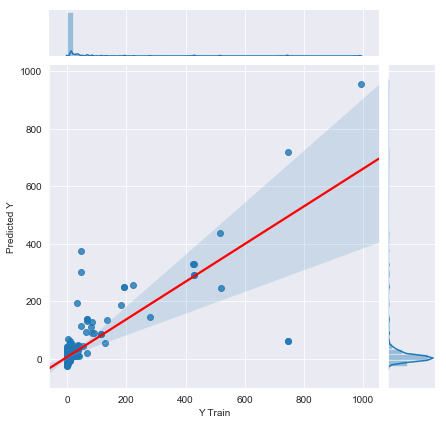

In [95]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_train, y = y_pred_train, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Train', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

In [96]:
from sklearn.model_selection import cross_val_score

Perform cross-validation to check for over-fitting/under-fitting.

In [97]:
scores = cross_val_score(linreg, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         38.22
Std Dev of RMSE for 10 folds Cross-Val:  34.69


In [98]:
from sklearn.utils import resample

Create a dataframe to print the effect/error of the current model.

In [99]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))

err = np.std([linreg.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, feature_names)
cdf['abs_effect'] = abs(cdf['effect'])

print(cdf.sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 17.08
Total Non-Zero Coefficients: 18

                               effect  error  abs_effect
nadac_cost_per_unit            62.560  6.000      62.560
vet_approved_drug               3.790  5.000       3.790
num_drug_interactions          -3.510  3.000       3.510
num_food_interactions           2.560  2.000       2.560
affected_humans_other_mammals  -2.040  2.000       2.040
generic_drug                    1.500  1.000       1.500
num_dosage_forms               -1.160  1.000       1.160
num_manufacturers_for_chem     -1.050  2.000       1.050
num_clinical_trials             0.970  3.000       0.970
avg_molecular_weight            0.860  3.000       0.860
illicit_drug                    0.590  1.000       0.590
investigational_drug           -0.470  2.000       0.470
num_targets                     0.280  1.000       0.280
Solid                           0.270  1.000       0.270

In [100]:
from sklearn import metrics

In [101]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.65
Train MAE:  14.99
Train MSE:  2306.21
Train RMSE: 48.02


### **Lasso Regression**

***Will multiple lasso regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [102]:
from sklearn.linear_model import Lasso

In [103]:
linlasso = Lasso()
linlasso.fit(X_train_scaled, y_train)
y_pred_train = linlasso.predict(X_train_scaled)

Perform cross-validation to optimize alpha for lasso model.

In [104]:
param_grid = {'alpha': [1e-5, 1e-3, 1e-1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
                        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 1e2, 125, 130, 135, 140,
                        145, 150, 155, 165, 170, 175, 200, 1e3, 1e4]}
grid = GridSearchCV(linlasso, param_grid, cv = 15, scoring = 'neg_mean_squared_error', n_jobs = 1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': [1e-05, 0.001, 0.1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 100.0, 125, 130, 135, 140, 145, 150, 155, 165, 170, 175, 200, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [105]:
print(grid.best_params_, '\n\n', 'RMSE:', np.sqrt(-grid.best_score_))

{'alpha': 1.4} 

 RMSE: 50.04811921097876


Create new lasso model at the optimized value of alpha.

In [106]:
linlasso = Lasso(alpha = 1.4)
linlasso.fit(X_train_scaled, y_train)
y_pred_train = linlasso.predict(X_train_scaled)
y_pred_test = linlasso.predict(X_test_scaled)

*Is there a linear relationship between our training values and our predicted values?*

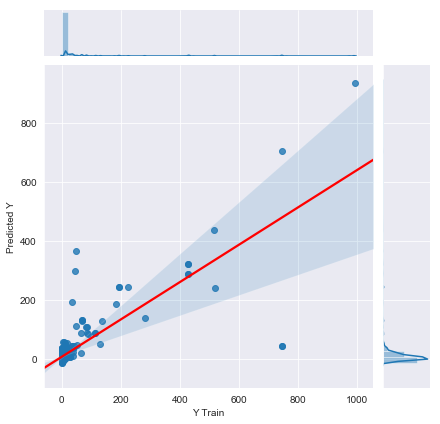

In [107]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_train, y = y_pred_train, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Train', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

Create a dataframe to print the effect/error of the current model.

In [108]:
print('Multiple Linear Regression Coefficients\nLasso Regression, Polynomial Degree 1\nAlpha = 1.4')
print('Intercept:', linlasso.intercept_.round(2))
print('Total Non-Zero Coefficients: {}'.format(len(cdf[cdf['effect'] != 0]['effect'].round(2))))
print('Total Zero Coefficients: {}\n'.format(len(cdf[cdf['effect'] == 0]['effect'].round(2))))

err = np.std([linlasso.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linlasso.coef_.round(2),
                    'error': err.round(2)}, feature_names)
cdf['abs_effect'] = abs(cdf['effect'])

print(cdf[cdf['effect'] != 0].sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Lasso Regression, Polynomial Degree 1
Alpha = 1.4
Intercept: 17.08
Total Non-Zero Coefficients: 18
Total Zero Coefficients: 0

                       effect  error  abs_effect
nadac_cost_per_unit    53.550  6.330      53.550
avg_molecular_weight    1.560  1.490       1.560
num_drug_interactions  -1.380  2.850       1.380
num_clinical_trials     0.800  0.990       0.800


In [109]:
print('Train R^2:  ', linlasso.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.62
Train MAE:  12.98
Train MSE:  2329.24
Train RMSE: 48.26


### **Ridge Regression**

***Will multiple ridge regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [110]:
from sklearn.linear_model import Ridge

In [111]:
linridge = Ridge()
linridge.fit(X_train_scaled, y_train)
y_pred_train = linridge.predict(X_train_scaled)
y_pred_test = linridge.predict(X_test_scaled)

Perform cross-validation to optimize alpha for ridge model.

In [112]:
param_grid = {'alpha': [1e-4, 1e-5, 1e-3, 1e-1, 1, 5, 6, 7, 8, 9, 10,
                        11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                        21, 30, 40, 50, 60, 70, 80, 90, 1e2, 125,
                        130, 135, 140, 145, 150, 155, 165, 170, 175,
                        200, 600, 690, 691, 692, 693, 694, 695, 696,
                        697, 698, 699,700, 705, 710, 800, 825, 850,
                        874, 875, 876, 877, 888, 889, 890, 891, 892,
                        893, 894, 895, 896, 897, 898, 899, 900, 1e3, 1100, 1e4]}
grid = GridSearchCV(linridge, param_grid, cv = 15, scoring = 'neg_mean_squared_error', n_jobs = 1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': [0.0001, 1e-05, 0.001, 0.1, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 30, 40, 50, 60, 70, 80, 90, 100.0, 125, 130, 135, 140, 145, 150, 155, 165, 170, 175, 200, 600, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 705, 710, 800, 825, 850, 874, 875, 876, 877, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 1000.0, 1100, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [113]:
print(grid.best_params_, '\n\n', 'RMSE:', np.sqrt(-grid.best_score_))

{'alpha': 1} 

 RMSE: 50.161572234751866


Create new ridge model at the optimized value of alpha.

In [156]:
linridge = Ridge(alpha = 1)
linridge.fit(X_train_scaled, y_train)
y_pred_train = linridge.predict(X_train_scaled)
y_pred_test = linridge.predict(X_test_scaled)

*Is there a linear relationship between our training values and our predicted values?*

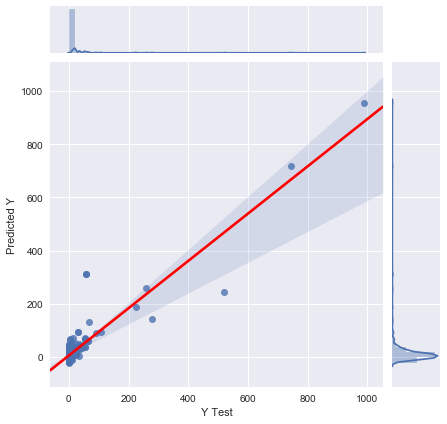

In [157]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_test, y = y_pred_test, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

Create a dataframe to print the effect/error of the current model.

In [158]:
print('Multiple Linear Regression Coefficients\nRIdge Regression, Polynomial Degree 1\nAlpha = 1')
print('Intercept:', linridge.intercept_.round(2))
print('Total Non-Zero Coefficients: {}'.format(len(cdf[cdf['effect'] != 0]['effect'].round(2))))
print('Total Zero Coefficients: {}\n'.format(len(cdf[cdf['effect'] == 0]['effect'].round(2))))

err = np.std([linridge.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linridge.coef_.round(2),
                    'error': err.round(2)}, feature_names)
cdf['abs_effect'] = abs(cdf['effect'])

print(cdf[cdf['effect'] != 0].sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
RIdge Regression, Polynomial Degree 1
Alpha = 7
Intercept: 17.08
Total Non-Zero Coefficients: 18
Total Zero Coefficients: 0

                               effect  error  abs_effect
nadac_cost_per_unit            65.290  5.750      65.290
num_drug_interactions          -3.550  3.140       3.550
avg_molecular_weight            1.660  2.580       1.660
investigational_drug           -1.640  2.120       1.640
num_food_interactions           1.510  2.510       1.510
num_patents_on_chem             1.160  1.650       1.160
num_clinical_trials            -0.860  3.110       0.860
generic_drug                    0.790  0.810       0.790
affected_humans_other_mammals   0.700  2.460       0.700
num_dosage_forms               -0.500  1.160       0.500
num_manufacturers_for_chem      0.460  1.520       0.460
num_packagers_for_chem         -0.340  2.600       0.340
illicit_drug                   -0.340  0.650       0.340
num_targets                    -0.330

In [159]:
print('Train R^2:  ', linridge.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.64
Train MAE:  14.99
Train MSE:  2306.22
Train RMSE: 48.02


Chosen model for testing is multiple linear regression

*Lowest RMSE across all models.*

In [118]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_test = linreg.predict(X_test_scaled)

In [119]:
scores = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         31.29
Std Dev of RMSE for 10 folds Cross-Val:  48.57


Create a dataframe to print the effect/error of the current model.

In [120]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))

err = np.std([linreg.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, feature_names)
cdf['abs_effect'] = abs(cdf['effect'])

print(cdf.sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 17.08
Total Non-Zero Coefficients: 18

                               effect  error  abs_effect
nadac_cost_per_unit            63.190  6.000      63.190
vet_approved_drug               4.170  5.000       4.170
num_drug_interactions          -3.110  3.000       3.110
affected_humans_other_mammals  -2.670  3.000       2.670
num_food_interactions           2.320  3.000       2.320
avg_molecular_weight           -1.500  3.000       1.500
num_packagers_for_chem         -1.050  3.000       1.050
num_manufacturers_for_chem     -1.000  1.000       1.000
investigational_drug            0.900  2.000       0.900
num_patents_on_chem            -0.700  2.000       0.700
generic_drug                    0.680  1.000       0.680
num_dosage_forms               -0.670  1.000       0.670
num_clinical_trials             0.650  3.000       0.650
illicit_drug                    0.550  1.000       0.550

In [121]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Test  R^2:  ', linreg.score(X_test_scaled, y_test).round(2))
print('Test  MAE: ', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('Test  MSE: ', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('Test  RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))

Train R^2:   0.65
Test  R^2:   0.86
Test  MAE:  12.55
Test  MSE:  758.48
Test  RMSE: 27.54


### **Obtaining Beta Values from Model of Choice**

Rescaled data for all x's (without train, test, split).

In [138]:
X_scaled = scaler.transform(X)

In [139]:
linreg = LinearRegression()
linreg.fit(X_scaled, y)
y_pred = linreg.predict(X_scaled)

In [140]:
scores = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         31.29
Std Dev of RMSE for 10 folds Cross-Val:  48.57


In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
feature_names2 = ['Avg Molecular Weight', 'Num Clinical Trials',
                 'Num Dosage Forms', 'Num Drug Interactions',
                 'Num Food Interactions', 'Num Manufacturers for Chem',
                 'Num Packagers for Chem', 'Num Patents on Chemical',
                 'Num Targets', 'NADAC Per Unit', 'Chemical State',
                 'Affected Humans/Other Mammals', 'Investigational Drug',
                 'Vet Approved Drug', 'Illicit Drug', 'Nutraceutical Drug',
                 'Generic Exists', 'Aromatic Molecular Framework']

In [143]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = feature_names2

In [144]:
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
6,2.455,Num Packagers for Chem
5,2.055,Num Manufacturers for Chem
2,1.762,Num Dosage Forms
1,1.461,Num Clinical Trials
4,1.432,Num Food Interactions
7,1.425,Num Patents on Chemical
3,1.411,Num Drug Interactions
13,1.278,Vet Approved Drug
11,1.187,Affected Humans/Other Mammals
0,1.136,Avg Molecular Weight


Create a dataframe to print the effect/error of the current model.

In [147]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))

err = np.std([linreg.fit(*resample(X_scaled, y)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, feature_names)
cdf['abs_effect'] = abs(cdf['effect'])
cdf.to_pickle('./Pickles/linreg_cdf.pkl')

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 17.96
Total Non-Zero Coefficients: 18



In [148]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Test  R^2:  ', linreg.score(X_test_scaled, y_test).round(2))
print('Test  MAE: ', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('Test  MSE: ', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('Test  RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))

Train R^2:   0.64
Test  R^2:   0.86
Test  MAE:  12.55
Test  MSE:  758.48
Test  RMSE: 27.54


In [149]:
cdf.sort_values(by = 'abs_effect', ascending = False).reset_index()['index']

0               nadac_cost_per_unit
1             num_drug_interactions
2                 vet_approved_drug
3                       num_targets
4             num_food_interactions
5              investigational_drug
6     affected_humans_other_mammals
7                      illicit_drug
8        num_manufacturers_for_chem
9      aromatic_molecular_framework
10                            Solid
11                 num_dosage_forms
12              num_clinical_trials
13              num_patents_on_chem
14           num_packagers_for_chem
15                     generic_drug
16             avg_molecular_weight
17               nutraceutical_drug
Name: index, dtype: object

In [150]:
vif.sort_values(by = 'VIF Factor', ascending = False).reset_index()['features']

0            Num Packagers for Chem
1        Num Manufacturers for Chem
2                  Num Dosage Forms
3               Num Clinical Trials
4             Num Food Interactions
5           Num Patents on Chemical
6             Num Drug Interactions
7                 Vet Approved Drug
8     Affected Humans/Other Mammals
9              Avg Molecular Weight
10     Aromatic Molecular Framework
11                      Num Targets
12                     Illicit Drug
13                   NADAC Per Unit
14             Investigational Drug
15                   Chemical State
16               Nutraceutical Drug
17                   Generic Exists
Name: features, dtype: object

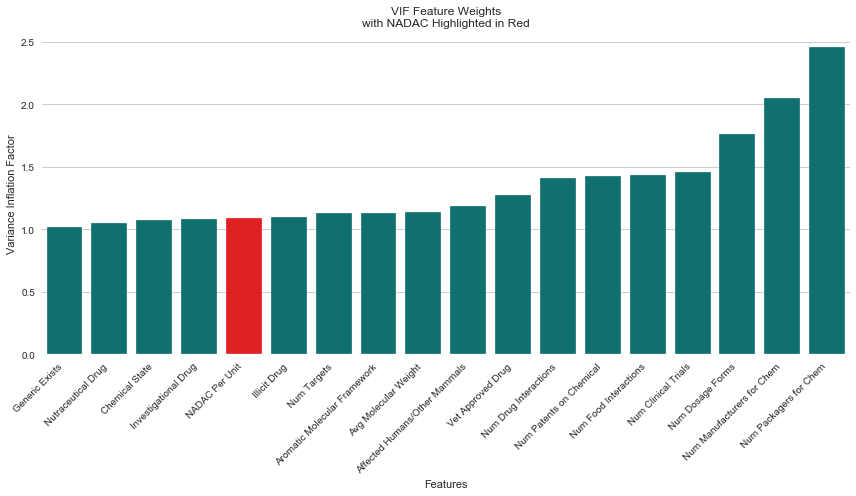

In [151]:
# graphed vif values by feature.
# features = ['Chemical State', 'Generic Exists',' Num Drug Interactions',
#             'Aromatic Molecular Framework', 'Affected Humans/Other Mammals',
#             'Num Packagers for Chemical', 'Avg Molecular Weight',
#             'Num Dosage Forms', 'Num Food Interactions','Num Manufacturers for Chem',
#             'Num Clinical Trials', 'Investigational Drug', 'Num Patents on Chemical',
#             'Vet Approved Drug', 'Num Targets', 'Illicit Drug',
#             'NADAC Per Unit', 'Nutraceutical Drug']

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

clrs = ['red' if (x == 'NADAC Per Unit') else 'teal' for x in vif.sort_values(by = 'VIF Factor', ascending = True).reset_index()['features']]
ax = sns.barplot(x = 'features', y = 'VIF Factor', palette = clrs,
                 data = vif.sort_values(by = 'VIF Factor', ascending = True).reset_index())
ax.set_title('VIF Feature Weights\nwith NADAC Highlighted in Red')
ax.set_xlabel('Features')
ax.set_ylabel('Variance Inflation Factor')
ax.set_xticklabels(vif.sort_values(by = 'VIF Factor', ascending = True).reset_index()['features'], 
                   rotation = 45, ha = "right")


plt.tight_layout()
plt.savefig('feature_importance_w_cost.png')

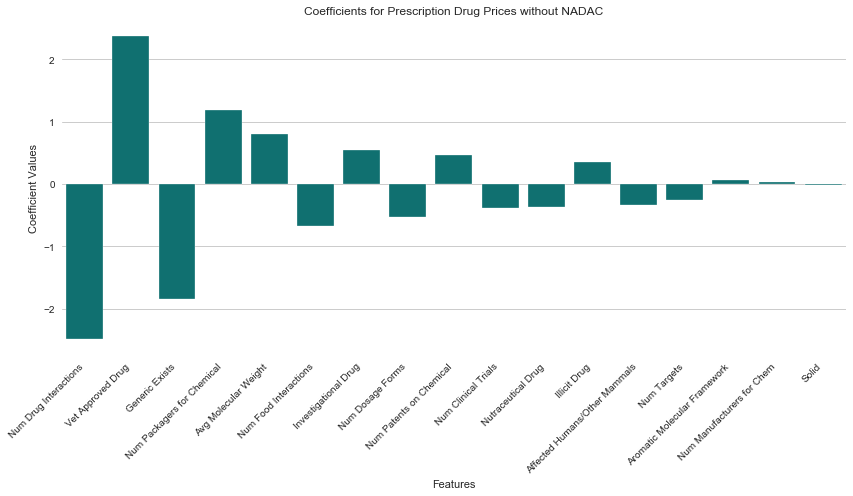

In [155]:
# graphed final beta values by feature (without pharmacy cost per unit).
features = ['NADAC per Unit', 'Num Drug Interactions', 'Vet Approved Drug',
            'Generic Exists', 'Num Packagers for Chemical', 'Avg Molecular Weight',
            'Num Food Interactions', 'Investigational Drug', 'Num Dosage Forms',
            'Num Patents on Chemical', 'Num Clinical Trials', 'Nutraceutical Drug',
            'Illicit Drug', 'Affected Humans/Other Mammals', 'Num Targets',
            'Aromatic Molecular Framework', 'Num Manufacturers for Chem', 'Solid']

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

ax = sns.barplot(x = 'index',  y = 'effect', 
                 data = cdf.sort_values(by = 'abs_effect', ascending = False)[1:].reset_index(), color = 'teal')
ax.set_title('Coefficients for Prescription Drug Prices without NADAC')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Values')
ax.set_xticklabels(features[1:], 
                   rotation = 45, ha = "right")

plt.tight_layout()
plt.savefig('feature_importance_no_cost_feature.png')

In [152]:
len(features)

NameError: name 'features' is not defined